<div style="direction:rtl;line-height:300%;"><font face="B Titr" size=5>
<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<div align=center>
<font face="B Titr" size=30>
<p></p>
به نام خدا
</font>
<br>
<font color=#FF7500>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br>
<font color=blue>
مبانی بیوانفورماتیک
</font>
<br>
محسن نقی‌پورفر

<br>
۹۴۱۰۶۷۵۷
</div>
<hr/>
<font color=red size=6>
<p></p>



<style type="text/css" scoped>
p{
border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
};
</style>

<div>
<h3> فهرست محتویات</h3>
<ul style="margin-right: 0;">
<li><a href="#section1">قسمت اول: توالی</a></li>
<li><a href="#section2">قسمت دوم: تشکیل درخت زندگی</a></li>
<li><a href="#section3">قسمت سوم: تخمین گذشته، پیش‌بینی آینده!</a></li>
<li><a href="#section4">قسمت چهارم: منابع و مآخذ</a></li>
</ul>
</div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section1" color=#FF7500 size=6>
قسمت اول: توالی
</font>
</h1><p></p>
سلام! به پروژه مبانی بیوانفورماتیک خوش آمدید! در این قسمت از پروژه قرار است، داده های مورد نیاز را از فایل‌ها بخوانیم و آنها را پردازش کنیم. ابتدا داده‌های مربوط به توالی ژنوم های گونه های مختلف ویروس ابولا و ژن های ویروس ماربرگ را خوانده، سپس با استفاده از توالی ژن های این ویروس، و داشتن ترتیب آمدن این ژن‌ها در توالی ویروس ابولا، با استفاده از الگوریتم های هم‌ترازی سعی در یافتن این توالی‌ها در گونه ‌های مختلف این ویروس می‌کنیم.
<br>
<br>
</div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<font color=#FF7500> 
<b>
توجه: 
</b>
</font>
این پروژه در یک مخزن گیت‌هاب نگه داری می‌شود. برای مراجعه به آن می‌توانید به <a href="http://github.com/MohsenNp/Ebolavirus">اینجا</a> مراجعه فرمایید. همچنین این پروژه با زبان پایتون، پیاده‌سازی شده است. <b>همچنین توضیحات بیشتر در مورد نحوه اجرای الگوریتم‌ها و قسمت های تئوری در فایل theoritical_report.pdf آمده است. در صورتی که در اینجا مورد مهمی اشاره نشده است، در آن فایل (ان‌شاء‌الله :دی) توضیحش پیدا می‌شود. </b>
</font></div>

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
درابتدا باتوجه به کدی که در پایی آمده است، متغیر های لازم را تعریف کرده و توابع مورد نیاز را پیاده‌سازی می کنیم. لازم به ذکر است که از پکیج های BioPython، Mathplotlib، Numpy، Pandas و ... استفاده شده است.
</div>

In [1]:
from Bio import SeqIO
from Bio import pairwise2
marburg_genes = [] # list of marburg genes
ebolavirus_genomes = [] # list of ebolavirus genomes 
all_genes = {} # dictionary which maps each geneName to found sequences in ebola genomes
edit_distance_matrices = [[[0 for i in range(5)] for j in range(5)] for k in range(7)] # matrix for edit distances
gene_names = ['GP', 'L', 'VP24', 'VP30', 'VP35', 'VP40', 'NP'] # all 7 gene names

In [2]:
def read_data(): # read data and initialize variables
    global ebolavirus_genomes, marburg_genes
    # read Marburg genes data
    marburg_genes = []
    for seq_record in SeqIO.parse("./Data/Marburg_Genes.fasta", "fasta"):
        marburg_genes.append(seq_record)

    # read Ebolaviruses genome data as seq_record objects
    Bundibugyo_genome = SeqIO.read("./Data/Bundibugyo_genome.fasta", "fasta")
    Reston_genome = SeqIO.read("./Data/Reston_genome.fasta", "fasta")
    Sudan_genome = SeqIO.read("./Data/Sudan_genome.fasta", "fasta")
    TaiForest_genome = SeqIO.read("./Data/TaiForest_genome.fasta", "fasta")
    Zaire_genome = SeqIO.read("./Data/Zaire_genome.fasta", "fasta")
    ebolavirus_genomes = [Bundibugyo_genome, Reston_genome, Sudan_genome, TaiForest_genome, Zaire_genome]

In [3]:
def glocal_alignment(genome, gene, match=1, mismatch=-1, gap_penalty=-1):  # Global-Local Alignment
    # Lengths of sequences
    len_genome = len(genome) + 1
    len_gene = len(gene) + 1

    # scores matrix
    scores = [[0 for i in range(len_genome)] for j in range(len_gene)]
    # traceback matrix
    traceback = [[0 for i in range(len_genome)] for j in range(len_gene)]  # to store the trace back path

    for i in range(len_gene):  # Adding penalty for gene --> score[i][0] == i * gap_penalty
        scores[i][0] = i * gap_penalty
    for i in range(1, len_gene):  # Dynamic Programming Formula
        for j in range(1, len_genome):
            if genome[j - 1] == gene[i - 1]:  # if matched
                diagonal = scores[i - 1][j - 1] + match
            else:
                diagonal = scores[i - 1][j - 1] + mismatch

            left = scores[i][j - 1] + gap_penalty  # gap
            above = scores[i - 1][j] + gap_penalty  # gap
            scores[i][j] = max(left, above, diagonal)  # dp formulation

            if scores[i][j] == diagonal:
                traceback[i][j] = 1  # 1 means trace diagonally
            elif scores[i][j] == left:
                traceback[i][j] = 2  # 2 means trace to the left
            else:
                traceback[i][j] = 3  # 3 means trace to the top

    genome_alignment, gene_alignment = '', ''  # alignments for printing

    max_j = scores[-1].index(max(scores[-1]))  # stores the number of column which the max number exists in
    while i >= 0 and j >= 0:
        if j > max_j:
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
            continue

        if traceback[i][j] == 1:  # 1 means to trace diagonally
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
            j -= 1
        elif traceback[i][j] == 2:  # 2 means trace to the left
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
        else:  # 3 means trace to the top
            genome_alignment = '-' + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
    score = 0  # Score of alignment
    for i in range(len(genome_alignment)):  # Calculate Score of alignment
        if genome_alignment[i] != gene_alignment[i]:
            score += 1
    # print(genome_alignment)
    # print(gene_alignment)
    return j, max_j, score  # returns substring(start, end) indices and score


In [4]:
def global_alignment(genome, gene, match=1, mismatch=-1, gap_penalty=-1):
    # Lengths of sequences
    len_genome = len(genome) + 1
    len_gene = len(gene) + 1

    # scores matrix
    scores = [[0 for i in range(len_genome)] for j in range(len_gene)]
    # traceback matrix
    traceback = [[0 for i in range(len_genome)] for j in range(len_gene)]  # to store the trace back path

    for i in range(len_gene):  # Adding penalty for gene --> score[i][0] == i * gap_penalty
        scores[i][0] = i * gap_penalty
    for i in range(len_genome):  # Adding penalty for gene --> score[0][i] == i * gap_penalty
        scores[0][i] = i * gap_penalty
    for i in range(1, len_gene):  # Dynamic Programming Formula
        for j in range(1, len_genome):
            if genome[j - 1] == gene[i - 1]:  # if matched
                diagonal = scores[i - 1][j - 1] + match
            else:
                diagonal = scores[i - 1][j - 1] + mismatch

            left = scores[i][j - 1] + gap_penalty  # gap
            above = scores[i - 1][j] + gap_penalty  # gap
            scores[i][j] = max(left, above, diagonal)  # dp formulation

            if scores[i][j] == diagonal:
                traceback[i][j] = 1  # 1 means trace diagonally
            elif scores[i][j] == left:
                traceback[i][j] = 2  # 2 means trace to the left
            else:
                traceback[i][j] = 3  # 3 means trace to the top

    genome_alignment, gene_alignment = '', ''  # alignments for printing

    max_j = scores[-1].index(max(scores[-1]))  # stores the number of column which the max number exists in
    while i >= 0 and j >= 0:
        if j > max_j:
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
            continue

        if traceback[i][j] == 1:  # 1 means to trace diagonally
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
            j -= 1
        elif traceback[i][j] == 2:  # 2 means trace to the left
            genome_alignment = genome[j - 1] + genome_alignment
            gene_alignment = '-' + gene_alignment
            j -= 1
        else:  # 3 means trace to the top
            genome_alignment = '-' + genome_alignment
            gene_alignment = gene[i - 1] + gene_alignment
            i -= 1
    score = 0  # Score of alignment
    for i in range(len(genome_alignment)):  # Calculate Score of alignment
        if genome_alignment[i] != gene_alignment[i]:
            score += 1
    # print(genome_alignment)
    # print(gene_alignment)
    return j, max_j, score  # returns substring(start, end) indices and score


In [5]:
def align_and_find_genes(genome):  # genome is the sequence of ebolavirus genome
    f = open('./Output/found_genes/' + genome.name + '.csv', "w")
    start = 0
    for gene in marburg_genes:  # For each genes found in marburg virus
        len_gene = len(gene.seq)
        end = (start + len_gene * 3) if len(genome) > (start + len_gene * 3) else len(
            genome)  # Just consider a subsequence of genome
        gene_str = str(gene.seq)
        genome_str = str(genome.seq)[start: end]
        # alignments = pairwise2.align.localmd(gene_str, genome_str, 1, -1, -1, -0.5, 0, 0) # Using biopython alignment function
        # final_alignment = alignments[0]  # final_alignment contains --> [align1, align2, score, begin, end]
        # begin_idx = final_alignment[3] # 3 is begin
        # end_idx = final_alignment[4] # 4 is end
        begin_idx, end_idx, unused = glocal_alignment(genome_str, gene_str)  # Apply Global-Local Alignment
        f.write(gene.name + "," + str(start + begin_idx) + "," + str(start + end_idx) + "\n")  # write to file
        start = end - len_gene  # update start index for the next gene to align
    f.close()


In [6]:
def start_aligning():  # Align all genes to all genomes in the given data
    for genome in ebolavirus_genomes:
        align_and_find_genes(genome)

In [5]:
# Section 2.2 in pdf
read_data()
start_aligning()

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
همانطور که از توابع تعریف شده در بالا مشخص است، با استفاده از این توابع،‌توالی ها را با استفاده از پکیج biopython خوانده و ژن های ویروس ماربرگ را در توالی ژنوم ۵ گونه ویروس ابولا هم تراز کرده و این اندیس ابتدا و انتهای این ژن هارا در فایل های مربوط به هر گونه ذخیره می‌کنیم. همچنین توجه کنید که بعدا چون قرار است که ژنوم ویروس ماربرگ را هم در بدست آوردن هم‌ترازی و Edit Distance استفاده کنیم، پس توابع را به صورت کلی تری پیاده‌سازی کردیم که قابلیت استفاده در قسمت های بعدی را نیز داشته باشند.

In [7]:
def global_align():  # Global Alignment For calculating score and edit distance matrices
    global edit_distance_matrices
    gene_id = 0
    for gene in all_genes.values():  # Iterate all genes for all genomes
        g1_id = 0
        for genome1 in gene:
            g2_id = 0
            for genome2 in gene:
                if genome1.seq != genome2.seq:
                    if g1_id <= g2_id:
                        continue
                    # alignments = pairwise2.align.globalms(genome1, genome2, 0, -1, -1, -1) # Biopython package
                    # alignment = alignments[0] # first alignment
                    # score = alignment[2] # score of alignment
                    a, b, score = global_alignment(genome1, genome2)  # Global Alignment
                    edit_distance = 1 * score  # Calculate score of alignment
                    edit_distance_matrices[gene_id][g1_id][g2_id] = edit_distance
                    edit_distance_matrices[gene_id][g2_id][g1_id] = edit_distance
                g2_id += 1
            g1_id += 1
        gene_id += 1

In [8]:
def update_edit_distance_matrix(marburg_genome): # Update edit matrix in case of adding Marburg genome
    global edit_distance_matrices
    edm = [[[0 for i in range(6)] for j in range(6)] for k in range(7)]  # new matrix for edit distances
    for i in range(7):
        for j in range(5):
            for k in range(5):
                edm[i][j][k] = edit_distance_matrices[i][j][k]
    genome = marburg_genome
    align_and_find_genes(genome) # Align all genes in marburg genome
    genome = str(genome.seq)
    gene_id = 0
    g1_id = 5
    for gene in all_genes.values():  # Iterate all genes for all genomes
        g2_id = 0
        for genome_2 in gene:
            a, b, score = global_alignment(genome, str(genome_2.seq))
            edit_distance = 1 * score
            edm[gene_id][g1_id][g2_id] = edit_distance
            edm[gene_id][g2_id][g1_id] = edit_distance
            g2_id += 1
        gene_id += 1
    edit_distance_matrices = edm # Update edit matrix

In [9]:
def read_genes(marburg_genome=None):  # read all <genome_name>.csv files for accessing genes in genomes
    global all_genes, edit_distance_matrices
    for gene in marburg_genes:  # For every gene (7 genes)
        i = 0
        genes = []
        for genome in ebolavirus_genomes:  # For every species in ebolavirus
            # if genome.name == 'Marburg':
            #     align_and_find_genes(genome)
            indices = pd.read_csv("./Output/found_genes/" + genome.name + ".csv", header=None)  # read .csv file
            begin_idx = int(indices.loc[i, 1])  # begin index for special gene
            end_idx = int(indices.loc[i, 2])  # end index for special gene
            new_record = SeqIO.SeqRecord(genome.seq[begin_idx: end_idx])  # Create SeqRecord Object File
            new_record.name = genome.name
            genes.append(new_record)  # Append to gene list
            i += 1
        all_genes[gene.name] = genes  # Append genelist to all_genes dictionary
    # genomes_size = len(genomes)
    # genes_size = len(marburg_genes)
    edit_distance_matrices = [[[0 for i in range(5)] for j in range(5)] for k in
                              range(7)]  # matrix for edit distances
    global_align()
    if marburg_genome:
        update_edit_distance_matrix(marburg_genome)

In [10]:
def save_edit_matrix(filename, matrix):  # Save edit distance matrices into files
    edit_matrix = np.array(matrix)  # Numpy Package is used here for saving into files
    np.savetxt("./Output/edit_matrices/" + filename + ".csv", edit_matrix, delimiter=",", fmt='%d')

In [11]:
def save_edit_matrices():  # Save edit distance matrices into files
    i = 0
    for name, gene in all_genes.items():
        save_edit_matrix(name, edit_distance_matrices[i])
        i += 1

In [ ]:
#Section 2.3 in pdf
read_genes(None)
save_edit_matrices()

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
در این سه قطعه کد، از الگوریتم های Global Alignment و نحوه محاسبه Edit Distance استفاده شده است، که با استفاده از آنها، ماتریس های فاصله را تشکیل می‌دهیم و در فایلی با نام قرارداد شده در پروژه ذخیره می‌کنیم. لازم به ذکر است که در این‌جا از پکیج های Biopython و Numpy استفاده شده است. البته الگوریتم Global Alignment به صورت جدا نیز پیاده‌سازی شده است و در واقع از آن استفاده گردیده و قسمتی که از پکیج Biopython استفاده شده، کامنت گردیده است.

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section2" color=#FF7500 size=6>
قسمت دوم: تشکیل درخت زندگی
</font>


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
در این قسمت،‌از ماتریس های فاصله بدست آمده ذخیره شده استفاده می‌کنیم. با استفاده از پکیج pandas ابتدا این فایل های با فرمت csv را خوانده و سپس با استفاده آن ماتریس را به صورت پایین مثلثی در آورده و به تابع سازنده درخت در پکیج biopython می‌دهیم. کد های مربوط به متغیر ها و توابع در زیر آمده‌اند. همچنین باتوجه به اینکه در قسمت های بعدی لازم است که ژنوم ماربرگ را هم به درخت اضافه کنیم، پس توابع را به طور کلی تری می‌زنیم که بعدا از آنها در آن قسمت نیز استفاده کنیم.

In [12]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor, DistanceMatrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

NJ_trees = [] # Trees which are constructed with NJ Algorithm
UPGMA_trees = [] # Trees which are constructed with UPGMA Algorithm

In [13]:
def convert_tu_lower_triangular(data_frame):  # Convert data_frame to a lower triangular matrix
    data_frame = data_frame.values.T.tolist()  # Convert data_frame to list of lists
    for i in range(5):
        data_frame[i] = data_frame[i][:i + 1]  # Remove unused data from data_frame --> Convert to lower triangular
    return data_frame

In [34]:
def save_tree(tree, filename):
    Phylo.draw(tree)  # Draw the tree
    plt.title(filename)  # set Title for figure
    plt.savefig('./Output/images/' + filename + '.png', dpi=100)  # Save tree in an image
    plt.close()  # Close the figure

In [33]:
def construct_tree(gene_name, with_marburg=1, algorithm='UPGMA'):  # Construct Tree with specific type (Default = UPGMA)
    if with_marburg == 1:
        filename = algorithm + '_' + gene_name
        names = ['Bundibugyo', 'Reston', 'Sudan', 'TaiForest', 'Zaire']
    else:
        filename = algorithm + '_' + gene_name + '_with_Marburg'
        names = ['Bundibugyo', 'Reston', 'Sudan', 'TaiForest', 'Zaire', 'Marburg']
        marburg_genome = SeqIO.read("./Data/Marburg_genome.fasta", "fasta")
        read_data()
        read_genes(marburg_genome)
    edit_matrix = pd.read_csv("./Output/edit_matrices/" + gene_name + ".csv", header=None)  # read edit matrix file
    constructor = DistanceTreeConstructor()  # Create a tree constructor object
    edit_matrix = convert_tu_lower_triangular(edit_matrix)  # Convert Edit Distance matrix to lower triangular
    # if len(names) != len(edit_matrix[0]):
    #     print(names)
    #     print(edit_matrix)
    distance_matrix = DistanceMatrix(names=names, matrix=edit_matrix)
    if algorithm == 'NJ':  # Neighbor-Joining Alogrithm
        tree = constructor.nj(distance_matrix)
    else:  # UPGMA Algorithm
        tree = constructor.upgma(distance_matrix)
    save_tree(tree, filename)  # Save Tree into a file
    return tree

In [35]:
def align_all_ebola_genomes(): # All all ebola genomes to each other
    edm = [[0 for i in range(5)] for j in range(5)] # New edit matrix
    read_data()
    all_genomes = ebolavirus_genomes
    g1_id = 0
    for genome1 in all_genomes:
        g2_id = 0
        for genome2 in all_genomes:
            if genome1.name != genome2.name and g2_id > g1_id:
                print('Aligning Genome {0} with {1}'.format(genome1.name, genome2.name))
                alignments = pairwise2.align.globalxx(genome1, genome2) # Biopython package
                alignment = alignments[0] # first alignment
                score = alignment[2] # score of alignment
                # a, b, score = Alignment.global_alignment(genome1.seq, genome2.seq) # Global Alignment
                edm[g1_id][g2_id] = score
                edm[g2_id][g1_id] = score
            g2_id += 1
        g1_id += 1
    print("genomes aligned!")
    save_edit_matrix("all_genes", edm)  # Save edit matrix to file
    construct_tree("all_genes", algorithm="UPGMA")  # Construct Tree
    construct_tree("all_genes", algorithm="NJ")  # Construct Tree

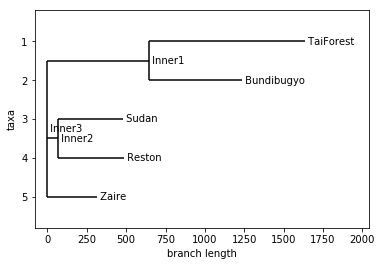

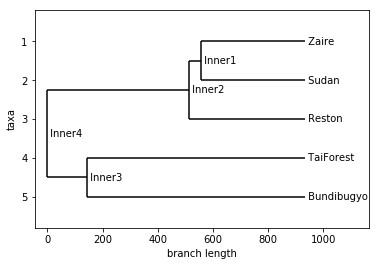

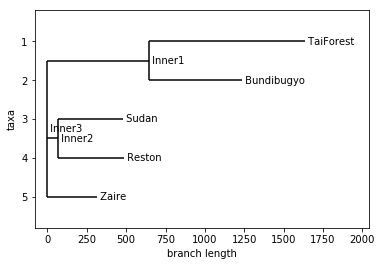

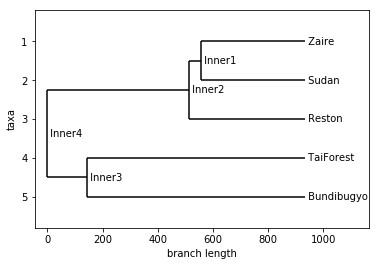

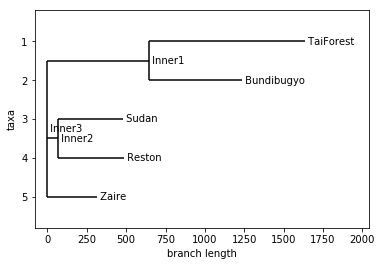

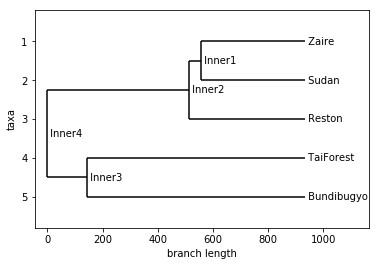

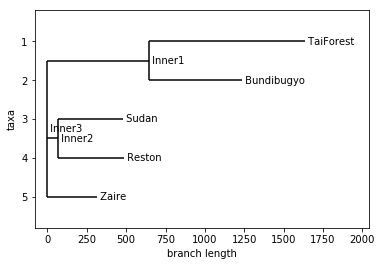

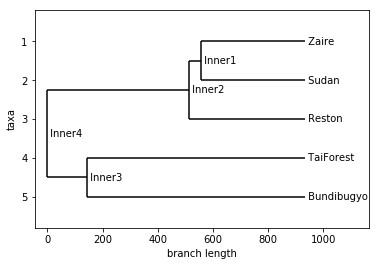

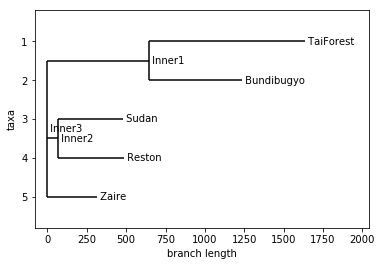

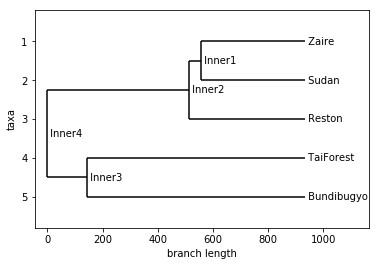

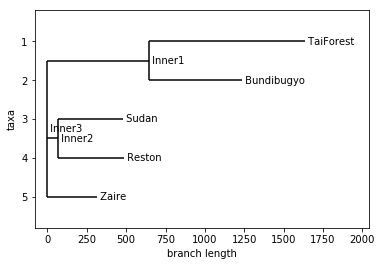

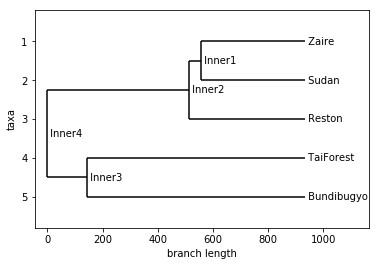

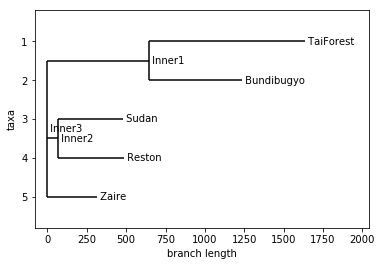

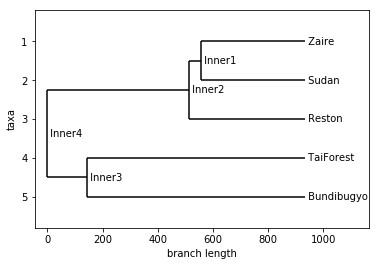

In [36]:
# Section 3.1
for gene_name in gene_names:  # For all genes
    NJ_trees.append(construct_tree(gene_name, algorithm="NJ"))  # Construct NJ Tree
    UPGMA_trees.append(construct_tree(gene_name, algorithm="UPGMA"))  # Construct UPGMA Tree

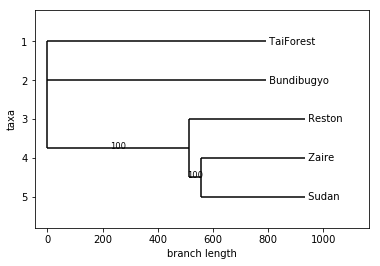

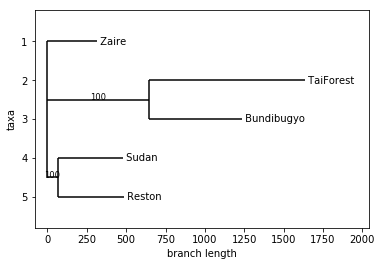

In [45]:
# Section 3.2
from Bio.Phylo.Consensus import *
NJ_trees = NJ_trees  # All NJ Trees in a list
UPGMA_trees = UPGMA_trees  # All UPGMA Trees in a list
NJ_tree = majority_consensus(NJ_trees, 0.4)  # Merge NJ Trees using Majority Consensus Algorithm
UPGMA_tree = majority_consensus(UPGMA_trees, 0.4)  # Merge UPGMA Trees using Majority Consensus Algorithm
Phylo.draw(UPGMA_tree)  # Draw merged UPGMA Tree --> it is not a good merge
Phylo.draw(NJ_tree)  # Draw merged NJ Tree

# final_tree = majority_consensus([NJ_tree, UPGMA_tree], 0.4)  # Merge UPGMA && NJ Trees (Not Recommended!)
# Phylo.draw_graphviz(final_tree) # Draw Final Tree

Aligning Genome Bundibugyo with Reston
Aligning Genome Bundibugyo with Sudan
Aligning Genome Bundibugyo with TaiForest
Aligning Genome Bundibugyo with Zaire
Aligning Genome Reston with Sudan
Aligning Genome Reston with TaiForest
Aligning Genome Reston with Zaire
Aligning Genome Sudan with TaiForest
Aligning Genome Sudan with Zaire
Aligning Genome TaiForest with Zaire
genomes aligned!


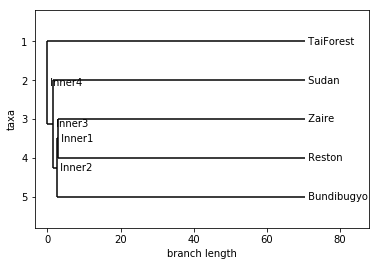

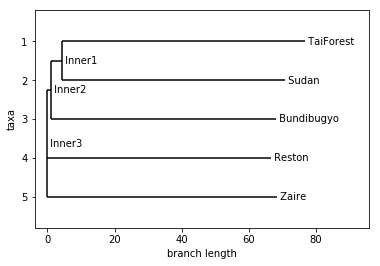

In [46]:
# Section 3.3 in pdf
align_all_ebola_genomes()

In [50]:
# Section 3.4 in pdf
for gene_name in gene_names:  # For all genes with Marburg Virus genome
    NJ_trees.append(construct_tree(gene_name, with_marburg=2, algorithm="NJ"))  # Construct NJ Tree (names = 2)
    UPGMA_trees.append(construct_tree(gene_name, with_marburg=2, algorithm="UPGMA"))  # Construct UPGMA Tree(names = 2)

KeyboardInterrupt: 

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
در کل، برای تشکیل درخت از پکیج biopython استفاده شده است که دارای ماژول های DistanceTreeConstructor، DistanceMatrix، NJ و UPGMA استفاده شده است که همانطور از اسمشان مشخص است این ماژول ها درخت را با گرفتن ماتریس فاصله به فرم پایین مثلثی، توسط الگوریتم های NJ و UPGMA می‌کشند.

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section3" color=#FF7500 size=6>
قسمت سوم: تخمین گذشته، پیش‌بینی آینده!
</font>


NameError: name 'a' is not defined

<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<h1><font  id="section4" color=#FF7500 size=6>
قسمت چهارم: منابع و مآخذ
</font>


<div style="direction:rtl;line-height:300%;"><font face="B Nazanin" size=5>
<ul style="margin-right: 0;">
<li><a href="http://biopython.org/wiki/Phylo">سایت Biopython</a></li>
<li><a href="http://www.wikipedia.org/">سایت ویکیپدیا</a></li>
<li><a href="https://github.com/Martinsos/edlib">مخزن edlb</a></li>
<li><a href="http://biopython.org/DIST/docs/api/Bio.pairwise2-module.html">هم‌ترازی pairwise</a></li>
</ul>
</div>